# Merging the datasets:

### 1- importing the datasets

In [1]:
#libraries for data reading and plotting
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
import math
from scipy import stats
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
import mplfinance as mpf
import plotly.express as px
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


In [2]:
SP = pd.read_csv('sap.csv')

In [3]:
SP.drop(['Unnamed: 0'], axis =1, inplace=True)
SP.rename(columns={'date':'date_parsed'},inplace=True)

In [4]:
SP['date_parsed']= pd.to_datetime(SP['date_parsed'])

In [5]:
SP

,date_parsed,open,high,low,close,volume,ticks,week_num,day_num,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL,6,39,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL,7,42,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL,7,43,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL,7,44,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL,7,45,2013
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259.0,ZTS,5,32,2018
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187.0,ZTS,5,33,2018
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031.0,ZTS,6,36,2018
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323.0,ZTS,6,37,2018


In [6]:
WSB = pd.read_csv('comments_sent.csv')
WSB.drop(['Unnamed: 0'], axis =1, inplace=True)

In [7]:
WSB['date_parsed'] = pd.to_datetime(WSB['timestamp'],format="%Y-%m-%d").dt.date
WSB['date_parsed']= pd.to_datetime(WSB['date_parsed'])

In [8]:
WSB.final_score.value_counts()

 0    1035612
 1    1018395
-1     760736
Name: final_score, dtype: int64

In [9]:
unique_date = pd.unique(WSB['date_parsed'])
unique_date 

array(['2014-10-09T00:00:00.000000000', '2014-02-19T00:00:00.000000000',
       '2014-04-24T00:00:00.000000000', ...,
       '2017-01-08T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
WSB_df = WSB.groupby(['date_parsed']).mean().reset_index()
WSB_df

C:\Users\10\AppData\Local\Temp\ipykernel_1524\3229939559.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,date_parsed,score,retrieved_on,controversiality,gilded,hour,week_num,day_num,year,compound,neg,neu,pos,final_score
0,2012-04-11,1.785714,1.428701e+09,0.000000,0.000000,19.571429,15.0,102.0,2012.0,0.054479,0.023143,0.909143,0.067714,0.071429
1,2012-04-12,1.000000,1.428703e+09,0.000000,0.000000,1.000000,15.0,103.0,2012.0,0.452700,0.000000,0.695000,0.305000,0.666667
2,2012-04-13,1.000000,1.428713e+09,0.000000,0.000000,12.000000,15.0,104.0,2012.0,-0.345400,0.125500,0.874500,0.000000,-0.500000
3,2012-04-14,1.000000,1.428718e+09,0.000000,0.000000,3.000000,15.0,105.0,2012.0,0.419900,0.000000,0.682000,0.318000,1.000000
4,2012-04-16,1.000000,1.428735e+09,0.000000,0.000000,23.000000,16.0,107.0,2012.0,0.727050,0.000000,0.823500,0.176500,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,2018-10-27,14.369789,1.541523e+09,0.018528,0.000515,12.615286,43.0,300.0,2018.0,0.056902,0.092644,0.775508,0.121809,0.104478
2338,2018-10-28,11.600187,1.541557e+09,0.013379,0.000311,12.600498,43.0,301.0,2018.0,0.054916,0.086344,0.788635,0.119729,0.095831
2339,2018-10-29,8.875192,1.541597e+09,0.016984,0.000110,15.217291,44.0,302.0,2018.0,0.030654,0.089829,0.790338,0.116326,0.066185
2340,2018-10-30,6.730000,1.541634e+09,0.009818,0.000000,14.331364,44.0,303.0,2018.0,0.009952,0.098196,0.780378,0.114790,0.024182


In [11]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [12]:
WSB_df['cont_sent'] = WSB_df.apply(lambda x: analysis(x['compound']),axis =1)
WSB_df.cont_sent.value_counts()

Positive    2233
Negative      89
Neutral       20
Name: cont_sent, dtype: int64

In [13]:
WSB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_parsed       2342 non-null   datetime64[ns]
 1   score             2342 non-null   float64       
 2   retrieved_on      2342 non-null   float64       
 3   controversiality  2342 non-null   float64       
 4   gilded            2342 non-null   float64       
 5   hour              2342 non-null   float64       
 6   week_num          2342 non-null   float64       
 7   day_num           2342 non-null   float64       
 8   year              2342 non-null   float64       
 9   compound          2342 non-null   float64       
 10  neg               2342 non-null   float64       
 11  neu               2342 non-null   float64       
 12  pos               2342 non-null   float64       
 13  final_score       2342 non-null   float64       
 14  cont_sent         2342 n

In [14]:
merge_df=pd.merge(SP,WSB_df, how='inner',on='date_parsed')

In [15]:
merge_df

,date_parsed,open,high,low,close,volume,ticks,week_num_x,day_num_x,year_x,...,hour,week_num_y,day_num_y,year_y,compound,neg,neu,pos,final_score,cont_sent
0,2013-02-11,14.8900,15.0100,14.2600,14.4600,8882000.0,AAL,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425.0,AAPL,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
2,2013-02-11,78.6500,78.9100,77.2300,78.3900,758016.0,AAP,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
3,2013-02-11,36.1300,36.1800,35.7500,35.8500,6031957.0,ABBV,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
4,2013-02-11,46.8500,47.0000,46.5000,46.7600,1115888.0,ABC,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616630,2018-02-07,71.2700,72.8600,71.1200,71.7900,1748941.0,XYL,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616631,2018-02-07,80.0700,81.9400,80.0000,80.1300,3561068.0,YUM,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616632,2018-02-07,121.6500,123.5200,120.7400,120.7800,1145267.0,ZBH,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616633,2018-02-07,52.2300,54.3150,52.2200,54.0200,6427280.0,ZION,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive


In [16]:
merge_df.dropna(inplace=True)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616624 entries, 0 to 616634
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_parsed       616624 non-null  datetime64[ns]
 1   open              616624 non-null  float64       
 2   high              616624 non-null  float64       
 3   low               616624 non-null  float64       
 4   close             616624 non-null  float64       
 5   volume            616624 non-null  float64       
 6   ticks             616624 non-null  object        
 7   week_num_x        616624 non-null  int64         
 8   day_num_x         616624 non-null  int64         
 9   year_x            616624 non-null  int64         
 10  score             616624 non-null  float64       
 11  retrieved_on      616624 non-null  float64       
 12  controversiality  616624 non-null  float64       
 13  gilded            616624 non-null  float64       
 14  hour

In [17]:
merge_df

,date_parsed,open,high,low,close,volume,ticks,week_num_x,day_num_x,year_x,...,hour,week_num_y,day_num_y,year_y,compound,neg,neu,pos,final_score,cont_sent
0,2013-02-11,14.8900,15.0100,14.2600,14.4600,8882000.0,AAL,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425.0,AAPL,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
2,2013-02-11,78.6500,78.9100,77.2300,78.3900,758016.0,AAP,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
3,2013-02-11,36.1300,36.1800,35.7500,35.8500,6031957.0,ABBV,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
4,2013-02-11,46.8500,47.0000,46.5000,46.7600,1115888.0,ABC,7,42,2013,...,11.875000,7.0,42.0,2013.0,0.058787,0.033500,0.894000,0.072500,0.250000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616630,2018-02-07,71.2700,72.8600,71.1200,71.7900,1748941.0,XYL,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616631,2018-02-07,80.0700,81.9400,80.0000,80.1300,3561068.0,YUM,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616632,2018-02-07,121.6500,123.5200,120.7400,120.7800,1145267.0,ZBH,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive
616633,2018-02-07,52.2300,54.3150,52.2200,54.0200,6427280.0,ZION,6,38,2018,...,12.203818,6.0,38.0,2018.0,0.023649,0.095453,0.780528,0.113207,0.051538,Positive


In [18]:
df = merge_df[['date_parsed','open','high','low','close','volume','ticks','compound','cont_sent','neg','neu','pos']]
df

,date_parsed,open,high,low,close,volume,ticks,compound,cont_sent,neg,neu,pos
0,2013-02-11,14.8900,15.0100,14.2600,14.4600,8882000.0,AAL,0.058787,Positive,0.033500,0.894000,0.072500
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425.0,AAPL,0.058787,Positive,0.033500,0.894000,0.072500
2,2013-02-11,78.6500,78.9100,77.2300,78.3900,758016.0,AAP,0.058787,Positive,0.033500,0.894000,0.072500
3,2013-02-11,36.1300,36.1800,35.7500,35.8500,6031957.0,ABBV,0.058787,Positive,0.033500,0.894000,0.072500
4,2013-02-11,46.8500,47.0000,46.5000,46.7600,1115888.0,ABC,0.058787,Positive,0.033500,0.894000,0.072500
...,...,...,...,...,...,...,...,...,...,...,...,...
616630,2018-02-07,71.2700,72.8600,71.1200,71.7900,1748941.0,XYL,0.023649,Positive,0.095453,0.780528,0.113207
616631,2018-02-07,80.0700,81.9400,80.0000,80.1300,3561068.0,YUM,0.023649,Positive,0.095453,0.780528,0.113207
616632,2018-02-07,121.6500,123.5200,120.7400,120.7800,1145267.0,ZBH,0.023649,Positive,0.095453,0.780528,0.113207
616633,2018-02-07,52.2300,54.3150,52.2200,54.0200,6427280.0,ZION,0.023649,Positive,0.095453,0.780528,0.113207


In [19]:
df1 = pd.get_dummies(df['cont_sent'])


In [20]:
df = pd.concat([df, df1], axis=1)

In [21]:
df.drop('cont_sent', inplace=True, axis = 1)


## Feature Engineering:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616624 entries, 0 to 616634
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date_parsed  616624 non-null  datetime64[ns]
 1   open         616624 non-null  float64       
 2   high         616624 non-null  float64       
 3   low          616624 non-null  float64       
 4   close        616624 non-null  float64       
 5   volume       616624 non-null  float64       
 6   ticks        616624 non-null  object        
 7   compound     616624 non-null  float64       
 8   neg          616624 non-null  float64       
 9   neu          616624 non-null  float64       
 10  pos          616624 non-null  float64       
 11  Negative     616624 non-null  uint8         
 12  Neutral      616624 non-null  uint8         
 13  Positive     616624 non-null  uint8         
dtypes: datetime64[ns](1), float64(9), object(1), uint8(3)
memory usage: 58.2+ MB


In [23]:
df['date_year'] = df['date_parsed'].dt.year
df['date_month'] = df['date_parsed'].dt.month
df['date_day'] = df['date_parsed'].dt.day
df


,date_parsed,open,high,low,close,volume,ticks,compound,neg,neu,pos,Negative,Neutral,Positive,date_year,date_month,date_day
0,2013-02-11,14.8900,15.0100,14.2600,14.4600,8882000.0,AAL,0.058787,0.033500,0.894000,0.072500,0,0,1,2013,2,11
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425.0,AAPL,0.058787,0.033500,0.894000,0.072500,0,0,1,2013,2,11
2,2013-02-11,78.6500,78.9100,77.2300,78.3900,758016.0,AAP,0.058787,0.033500,0.894000,0.072500,0,0,1,2013,2,11
3,2013-02-11,36.1300,36.1800,35.7500,35.8500,6031957.0,ABBV,0.058787,0.033500,0.894000,0.072500,0,0,1,2013,2,11
4,2013-02-11,46.8500,47.0000,46.5000,46.7600,1115888.0,ABC,0.058787,0.033500,0.894000,0.072500,0,0,1,2013,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616630,2018-02-07,71.2700,72.8600,71.1200,71.7900,1748941.0,XYL,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7
616631,2018-02-07,80.0700,81.9400,80.0000,80.1300,3561068.0,YUM,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7
616632,2018-02-07,121.6500,123.5200,120.7400,120.7800,1145267.0,ZBH,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7
616633,2018-02-07,52.2300,54.3150,52.2200,54.0200,6427280.0,ZION,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7


In [24]:
# define a function that computes the difference between each row and the previous one
def diff(x):
    return x - x.shift(1)

# apply the function to each group separately
df['Target_Variable'] = df.groupby('ticks')['close'].apply(diff)
df.dropna(axis = 0,inplace=True)
df[df.ticks =='AAPL']



C:\Users\10\AppData\Local\Temp\ipykernel_1524\2528845939.py:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,date_parsed,open,high,low,close,volume,ticks,compound,neg,neu,pos,Negative,Neutral,Positive,date_year,date_month,date_day,Target_Variable
477,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363.0,AAPL,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,-1.7186
953,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995.0,AAPL,-0.097000,0.178667,0.775667,0.045667,1,0,0,2013,2,13,-0.1272
1429,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154.0,AAPL,0.726900,0.000000,0.396000,0.604000,0,0,1,2013,2,14,-0.0600
1905,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631.0,AAPL,0.083643,0.054286,0.879429,0.066286,0,0,1,2013,2,15,-0.9185
2381,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046.0,AAPL,0.156300,0.120250,0.732500,0.147250,0,0,1,2013,2,19,-0.0243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614111,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787.0,AAPL,0.037433,0.091544,0.780594,0.115354,0,0,1,2018,2,1,0.3500
614616,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825.0,AAPL,0.023802,0.092684,0.783900,0.109334,0,0,1,2018,2,2,-7.2800
615121,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522.0,AAPL,0.002557,0.100971,0.773444,0.112510,0,0,1,2018,2,5,-4.0100
615626,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838.0,AAPL,0.012886,0.095194,0.779232,0.113308,0,0,1,2018,2,6,6.5400


In [65]:

from sklearn.preprocessing import StandardScaler
features  = ['open','high','low','close','volume','compound','neg','neu','pos','Negative','Neutral','Positive']


y = df['Target_Variable']
X = df.drop('Target_Variable', axis=1)

# store the index of the target variable
y_index = y.index

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

# combine the scaled features and target variable into a new DataFrame
# combine the scaled features and target variable into a new DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=features, index=y_index)
df_scaled['y'] = y

In [66]:
df_scaled

,open,high,low,close,volume,compound,neg,neu,pos,Negative,Neutral,Positive,y
476,-0.704223,-0.705351,-0.706249,-0.706194,0.438458,-0.480393,-1.716269,2.715326,-1.601514,-0.132746,-0.06243,0.147166,-0.1900
477,-0.149891,-0.152140,-0.160687,-0.167083,16.988354,-0.480393,-1.716269,2.715326,-1.601514,-0.132746,-0.06243,0.147166,-1.7186
478,-0.048478,-0.053311,-0.050036,-0.046519,-0.396404,-0.480393,-1.716269,2.715326,-1.601514,-0.132746,-0.06243,0.147166,0.2100
479,-0.485573,-0.487835,-0.487902,-0.489310,0.363368,-0.480393,-1.716269,2.715326,-1.601514,-0.132746,-0.06243,0.147166,-0.4300
480,-0.373479,-0.374450,-0.369932,-0.370972,-0.345511,-0.480393,-1.716269,2.715326,-1.601514,-0.132746,-0.06243,0.147166,0.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616630,-0.121498,-0.111986,-0.116194,-0.116352,-0.295969,-0.879024,0.781738,-0.297891,-0.435317,-0.132746,-0.06243,0.147166,0.4600
616631,-0.031248,-0.019651,-0.024302,-0.030829,-0.087272,-0.879024,0.781738,-0.297891,-0.435317,-0.132746,-0.06243,0.147166,-0.4500
616632,0.395181,0.403178,0.397283,0.386018,-0.365493,-0.879024,0.781738,-0.297891,-0.435317,-0.132746,-0.06243,0.147166,-1.5200
616633,-0.316765,-0.300572,-0.311775,-0.298575,0.242821,-0.879024,0.781738,-0.297891,-0.435317,-0.132746,-0.06243,0.147166,1.5000


C:\Users\10\AppData\Local\Temp\ipykernel_1524\1880686745.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



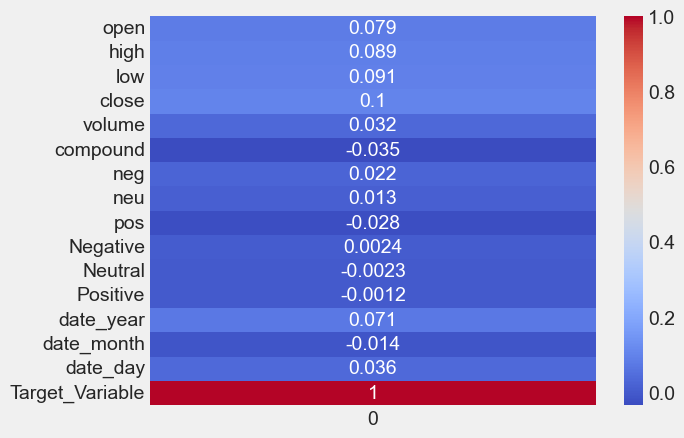

In [70]:
corr_with_target = df.corrwith(df['Target_Variable'][df.ticks == 'AMZN'])

# plot the heatmap
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm')
plt.show()

In [68]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# load the dataframe
#df = pd.read_csv('your_data.csv')
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled[features], df_scaled['y'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)

# analyze the coefficients to determine feature importance
coef_df = pd.DataFrame({'feature': features, 'coefficient': model.coef_})

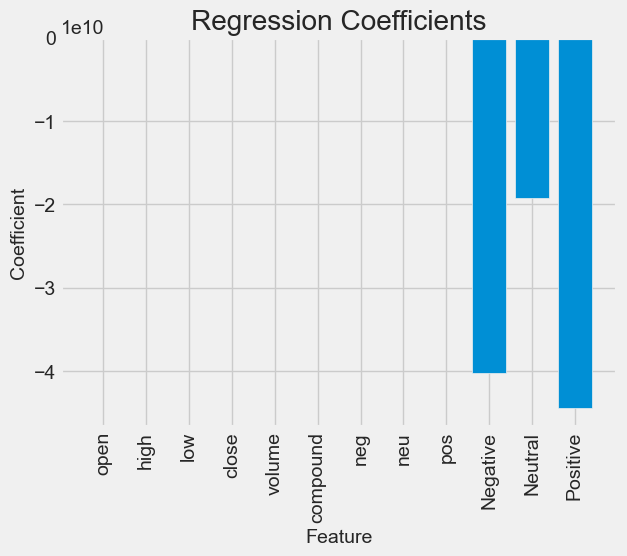

In [69]:
plt.bar(coef_df['feature'], coef_df['coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Regression Coefficients')
plt.show()